# About this notebook

In the following notebook, I reviewed the Titanic (test) dataset. 
I tried to examine the different parts of the dataset to have more insight into the issue.

<img src= "https://www.historic-uk.com/wp-content/uploads/2017/04/the-sinking-of-the-rms-titanic.jpg" alt ="Titanic" style='width: 300px;' class="center">

Each feature has been studied separately in related cells. I tried to include data description, data cleaning, statistical description, data distribution, correlations, and relationships in this notebook.

::: Updates :::
* Last update: 08.Jul.2021
* Updates: 
        * Add more methods to text analyzing
        * Reviewd the Ticket part

# Table of contents

* Importing Libraries
* Obtaining Data
* Overview
    * Data description
    * Data types
* Data cleaning
    * Missing values
* "Pclass"
* "Parch"
* "Ticket"
    * Ticket price
* "Siblings"
    * Outliers
* "Name"
    * Separating
    * Word cloud

# Importing Libraries

In [65]:
import os
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textwrap import wrap

# Obtaining Data

In [66]:
data = pd.read_csv(r'C:\Users\saman\Downloads\Compressed\test.csv')

# An overview of dataset

In [67]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Check Data description
Checking the simple statistical description of the problem

In [68]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Check the data types
Printing the data file information, including size, Dtype, number of attributes, etc.

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Printing out the columns' names for further reviews

In [70]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data cleaning

## Check missing values

In [71]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [72]:
data['Cabin'] = data['Cabin'].fillna(0)

I market the NaN values for "*Cabin*" feature to zero, to extend the experiments with the current data

In [73]:
data = data.dropna(axis=0)

In [74]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Studying the Pclass
Grouping different columns to extract detailed and summary info concerning various features.

In [75]:
data.groupby(data['Pclass']).mean()

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1102.091837,40.918367,0.520408,0.418367,100.329423
2,1120.681818,28.777500,0.397727,0.363636,22.608948
3,1086.565517,23.776414,0.510345,0.406897,12.022069


In [76]:
data.groupby(data['Pclass']).count()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,98,98,98,98,98,98,98,98,98,98
2,88,88,88,88,88,88,88,88,88,88
3,145,145,145,145,145,145,145,145,145,145


Text(0.5, 1.0, 'Classes')

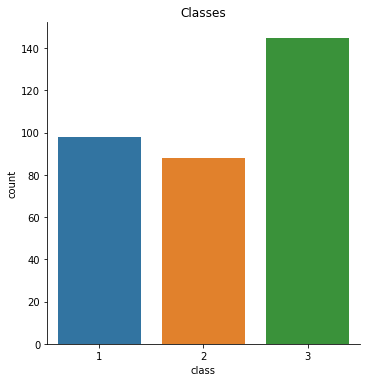

In [77]:
import warnings
warnings.simplefilter('ignore')
Pclass = data.groupby(data['Pclass'])['Pclass'].count()
sns.factorplot('Pclass', data=data, kind='count', aspect=1)
plt.xlabel('class')
plt.title('Classes')

From the following plot, we can observe the number of passengers of each class with regard to their sex. 

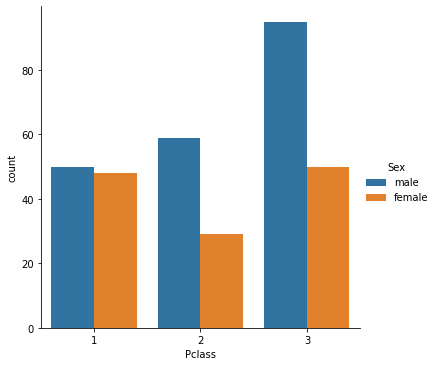

In [78]:
sns.factorplot('Pclass', data = data, hue = 'Sex', kind='count')

**Checking the number of men and women in each class**

In [79]:
pd.crosstab(index=data['Pclass'], columns=[data['Sex']],
            margins=True).style.background_gradient(cmap='YlGn')

Sex,female,male,All
Pclass,,,
1,48,50,98
2,29,59,88
3,50,95,145
All,127,204,331


The third class has the highest population on the ship, and most of them (almost 66%) are men.

# Studying the Parch

Extracting the counts of parach

In [80]:
data.Parch
data['parched'] = data['Parch'].apply(lambda x: x>0)
parched = data[data['parched'] == True]
parched['parched'].value_counts()

True    85
Name: parched, dtype: int64

85 samples have Parched

In [81]:
parched.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,parched
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,True
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,0,S,True
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,0,S,True
23,915,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,0,C,True
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,True


Text(0.5, 1.0, 'Histogram of parch')

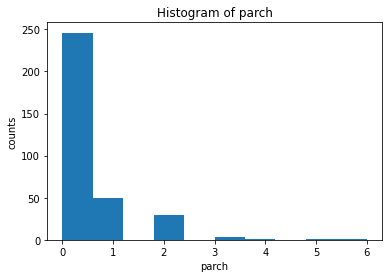

In [82]:
plt.hist(data['Parch'])
plt.xlabel('parch')
plt.ylabel('counts')
plt.title('Histogram of parch')

**Exploring the sex in each class and the values of parch**

In [83]:
pd.crosstab(index=data['Parch'], columns=[data['Pclass'], data['Sex']],
            margins=True).style.background_gradient(cmap='YlGn')

We can see the first row of Parch has the highest values for all genders and classes. The highest value goes to the third class, which is regarding the men.

# Studying the Ticket
#### Total of passengers with regard to the port
I tool the advantages of the pivot table from pandas. This table gives us a better dashboard table.

In [84]:
pd.pivot_table(data=data, index='Sex', values='Ticket',
                    columns='Embarked', aggfunc=len, margins=True)

Embarked,C,Q,S,All
Sex,,,,
female,37,12,78,127
male,45,10,149,204
All,82,22,227,331


## Reviewing the Ticket price

In [85]:
pd.DataFrame(data.groupby('Ticket')['Fare'].mean())

,Fare
Ticket,
110469,26.0000
110489,26.5500
110813,75.2500
112058,0.0000
112377,27.7208
...,...
STON/OQ. 369943,8.0500
W./C. 14260,10.5000
W./C. 14266,10.5000


## Sampling the dataset

In [86]:
sample = data.sample(frac=0.2, random_state=2)
print(sample.shape)
sample.tail()

(66, 12)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,parched
340,1232,2,"Fillbrook, Mr. Joseph Charles",male,18.0,0,0,C.A. 15185,10.500,0,S,False
349,1241,2,"Walcroft, Miss. Nellie",female,31.0,0,0,F.C.C. 13528,21.000,0,S,False
13,905,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.000,0,S,False
401,1293,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.000,0,S,False
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.0,0,2,SOTON/O.Q. 3101315,13.775,0,S,True


## Histogram of the ticket's price over a random sample

Text(0.5, 0.98, "Distribution of Ticket's price")

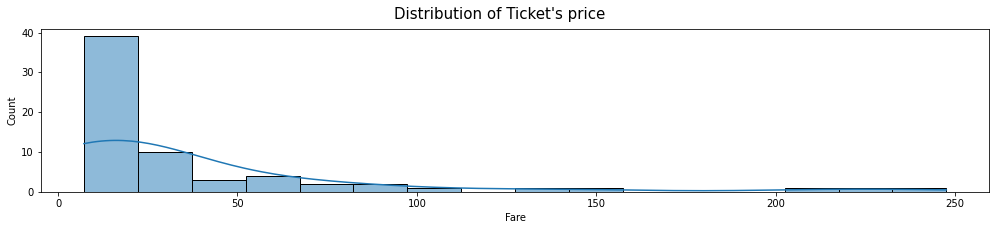

In [87]:
fig, ax = plt.subplots(figsize=(17, 3))
sns.histplot(x="Fare", kde=True, data=sample)
fig.suptitle('Distribution of Ticket\'s price', fontsize=15)

Text(0.5, 1.0, 'Conditional distributions')

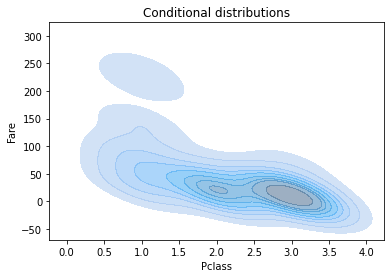

In [88]:
sns.kdeplot(
   data=sample,x='Pclass',y="Fare",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title("Conditional distributions")

****
**The price of each boarding a ship**

In [89]:
pd.crosstab(index=data['Fare'], columns=[data['Embarked'], data['Parch']],
            margins=True)

Embarked   C             Q       S                      All
Parch      0   1  2  3   0  1    0   1   2  3  4  5  6     
Fare                                                       
0.0        0   0  0  0   0  0    1   0   0  0  0  0  0    1
3.1708     0   0  0  0   0  0    0   1   0  0  0  0  0    1
6.4958     0   0  0  0   0  0    1   0   0  0  0  0  0    1
6.95       0   0  0  0   1  0    0   0   0  0  0  0  0    1
7.0        0   0  0  0   0  0    1   0   0  0  0  0  0    1
...       ..  .. .. ..  .. ..  ...  ..  .. .. .. .. ..  ...
247.5208   0   1  0  0   0  0    0   0   0  0  0  0  0    1
262.375    2   0  1  2   0  0    0   0   0  0  0  0  0    5
263.0      0   0  0  0   0  0    0   0   1  0  1  0  0    2
512.3292   0   1  0  0   0  0    0   0   0  0  0  0  0    1
All       55  20  5  2  21  1  170  29  24  1  1  1  1  331

[149 rows x 14 columns]

## Studying the siblings of the passengers

In [90]:
data.groupby(data['SibSp'])['SibSp'].count()

SibSp
0    213
1     97
2     11
3      4
4      4
5      1
8      1
Name: SibSp, dtype: int64

In [91]:
pd.crosstab(index=data['SibSp'], columns=[data['Pclass']],
            margins=True).style.background_gradient(cmap='YlGn')

Pclass,1,2,3,All
SibSp,,,,
0,52,57,104,213
1,42,27,28,97
2,3,4,4,11
3,1,0,3,4
4,0,0,4,4
5,0,0,1,1
8,0,0,1,1
All,98,88,145,331


We can observe that most of the passengers had no siblings.

In [92]:
print('Data type of siblings:', data['SibSp'].dtype, '\n')

Data type of siblings: int64 



## Outliers treatment
Checking the outliers and dealing with them

Text(0.5, 1.0, 'Checking siblings outliers')

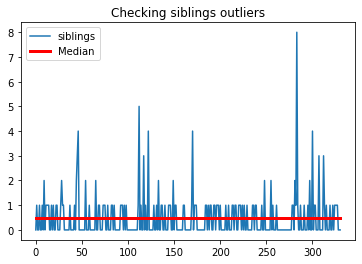

In [93]:
SibSp = (data.SibSp).values
m = []
for i in range(SibSp.shape[0]):
    m.append(np.mean(SibSp))
plt.plot(SibSp, label='siblings')
plt.plot(m, linewidth=3, color='r', label='Median')
plt.legend()
plt.title("Checking siblings outliers")

> From the above plot, we observe some out range data that has a high distance to the mean.

So, we saw that there are some data with high distances. How about measuring the real gaps to the average? For this matter, I calculated it as following.

In [94]:
z = np.abs(stats.zscore(SibSp))
print(z)

[0.55327231 0.59130978 0.55327231 0.55327231 0.59130978 0.55327231
 0.55327231 0.59130978 0.55327231 1.73589187 0.55327231 0.59130978
 0.59130978 0.59130978 0.59130978 0.55327231 0.55327231 0.59130978
 0.55327231 0.59130978 0.55327231 0.55327231 0.59130978 0.59130978
 0.55327231 0.55327231 0.55327231 0.59130978 1.73589187 0.59130978
 0.59130978 0.55327231 0.55327231 0.55327231 0.55327231 0.55327231
 0.55327231 0.59130978 0.55327231 0.55327231 0.55327231 0.55327231
 0.59130978 0.55327231 1.73589187 2.88047396 4.02505605 0.55327231
 0.55327231 0.55327231 0.55327231 0.55327231 0.55327231 0.55327231
 1.73589187 0.55327231 0.55327231 0.55327231 0.59130978 0.55327231
 0.55327231 0.55327231 0.55327231 0.55327231 0.55327231 1.73589187
 0.55327231 0.55327231 0.59130978 0.59130978 0.55327231 0.55327231
 0.55327231 0.59130978 0.59130978 0.59130978 0.55327231 0.55327231
 0.59130978 0.55327231 0.55327231 0.55327231 0.59130978 0.59130978
 0.55327231 0.59130978 0.55327231 0.55327231 0.55327231 0.5532

Text(0.5, 1.0, 'Distance of the SibSp value from the average')

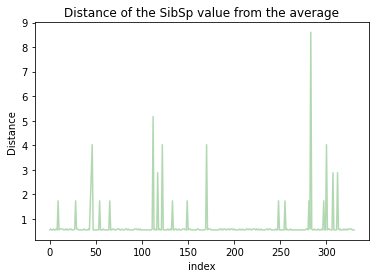

In [95]:
plt.plot(z, c='g', alpha=0.3)
plt.ylabel('Distance')
plt.xlabel('index')
plt.title('Distance of the SibSp value from the average')

Another way to check these outliers is the box plot. Besides the quarters, mean and median, It will give us the area above or below the Max/Min of the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x20eb9692e88>,
 'caps': [<matplotlib.lines.Line2D at 0x20eb9697e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x20eb9692688>],
 'medians': [<matplotlib.lines.Line2D at 0x20eb9692c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x20eb969dbc8>],
 'means': [<matplotlib.lines.Line2D at 0x20eb9692fc8>]}

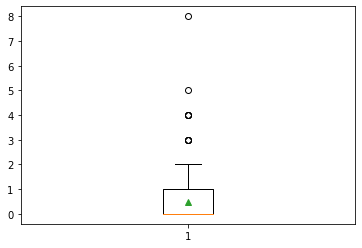

In [96]:
plt.boxplot(data['SibSp'], 0,'o',showbox=True,
            showfliers=True, showcaps=True, showmeans=True)

> Based on the IQR definition, I defined the upper and lower bounds to drop the part of the feature values which I do not want in my experiments.

In [97]:
Q1 = np.percentile(SibSp, 25, interpolation='midpoint')
Q3 = np.percentile(SibSp, 65, interpolation='midpoint')
IQR = Q3 - Q1
upper = np.where(SibSp>=(Q3+1.5*IQR))
lower = np.where(SibSp<=(Q1-1.5*IQR))
newSibSp = pd.DataFrame(SibSp)
newSibSp.drop(upper[0], inplace=True)
newSibSp.drop(lower[0], inplace=True)
print(newSibSp.shape)
newSibSp.head()

(321, 1)


,0
0,0
1,1
2,0
3,0
4,1


Here, let's see the updated box plot, in the following plot, we do not have any outliers as before.

Text(0.5, 1.0, 'Siblings real values')

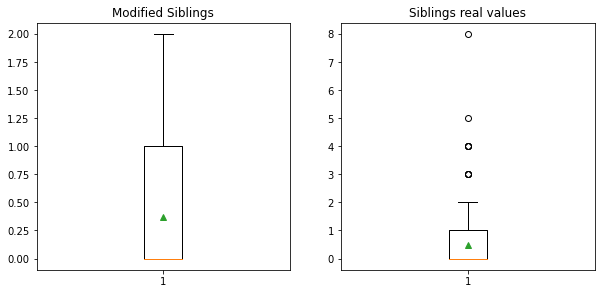

In [98]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.boxplot(newSibSp, 0,'o',showbox=True,
            showfliers=True, showcaps=True, showmeans=True)
plt.title("Modified Siblings")
plt.subplot(2,2,2)
plt.boxplot(data['SibSp'], 0,'o',showbox=True,
            showfliers=True, showcaps=True, showmeans=True)
plt.title("Siblings real values")

# Studying the Name

In [99]:
name = data.Name
name = name.values
len(np.unique(name))

331

****In memorial of the passengers, I prefer to print all the names****

In [100]:
print("Names:", name)

Names: ['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram'
 'Louch, Mr. Charles Alexander' 'Jefferys, Mr. Clifford Thomas'
 'Dean, Mrs. Bertram (Eva Georgetta Light)' 'Mock, Mr. 

## Splitting the names

In [101]:
names = data['Name'].apply(lambda x: x.split(', ')[0])

In [102]:
names

0              Kelly
1             Wilkes
2              Myles
3               Wirz
4           Hirvonen
           ...      
409          Peacock
411          Minahan
412       Henriksson
414    Oliva y Ocana
415          Saether
Name: Name, Length: 331, dtype: object

In [103]:
data['titles'] = data['Name'].str.extract('([A-Za-z]+)\.')
pd.crosstab(data.titles,data.Pclass).T.style.background_gradient(cmap='Set1_r')

titles,Col,Dona,Dr,Master,Miss,Mr,Mrs,Rev
Pclass,,,,,,,,
1,2,1,1,2,14,45,33,0
2,0,0,0,2,16,55,13,2
3,0,0,0,13,34,82,16,0


The table shows that the third class was like the first_class as we can observe the "Master" title here.

For the purpose of **NLP**, we could convert all letters to **lower case**. I used the lower function to do that.

In [104]:
LowerCase = names.apply(lambda x: x.lower())
LowerCase

0              kelly
1             wilkes
2              myles
3               wirz
4           hirvonen
           ...      
409          peacock
411          minahan
412       henriksson
414    oliva y ocana
415          saether
Name: Name, Length: 331, dtype: object

## Word cloud

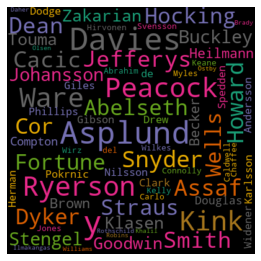

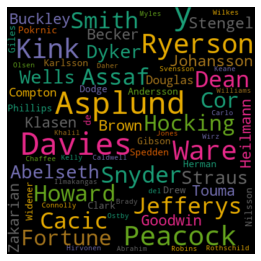

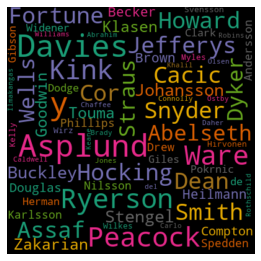

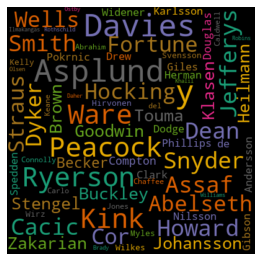

In [105]:
name = " ".join(name for name in names)

for i in range(4):
    wordcloud = WordCloud(width=400, height=400, max_font_size=50, max_words=70, colormap="Dark2").generate(name).generate(name)
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")